# Resumo


Neste projeto será feita uma análise exploratória de um conjunto de dados de uma empresa de publicidade, indicando se um usuário de internet específico clicou ou não em uma propaganda. Será criado um modelo que preveja se a pessoa clicará ou não em um anúncio baseado nos recursos desse usuário.


In [205]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Visão geral do dataset

In [206]:
df = pd.read_csv('advertising.csv')
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


# Informações adicionais

In [207]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


***
# Traduzindo colunas

In [208]:
df.columns = ['minutos no site', 'idade', 'renda anual',
       'minutos de navegacao por dia', 'titulo do anuncio', 'cidade do cliente', 'sexo', 'nacionalidade',
       'horario que saiu da internet', 'clicou no anuncio']

In [209]:
df.head()

,minutos no site,idade,renda anual,minutos de navegacao por dia,titulo do anuncio,cidade do cliente,sexo,nacionalidade,horario que saiu da internet,clicou no anuncio
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


# Visualizando distribuição de idade dos clientes

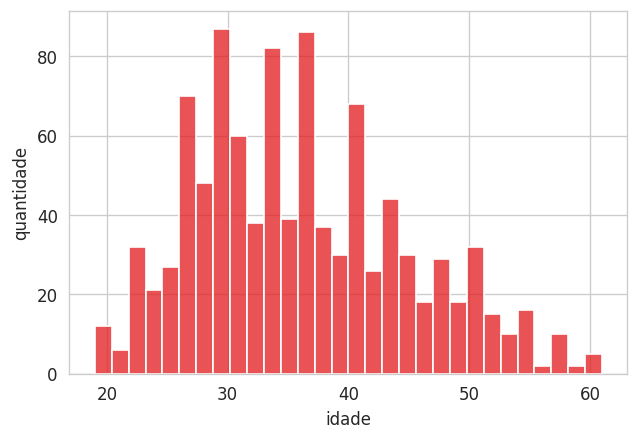

In [210]:
sns.set_style("whitegrid")
plt.figure(dpi=120)
sns.set_palette("Set1")
plt.ylabel("quantidade")
sns.histplot(data=df, x='idade',bins=30)
plt.show()

Obs: A maioria dos cliente estão abaixo dos 40 anos
***


# Visualizando renda dos clientes por idade

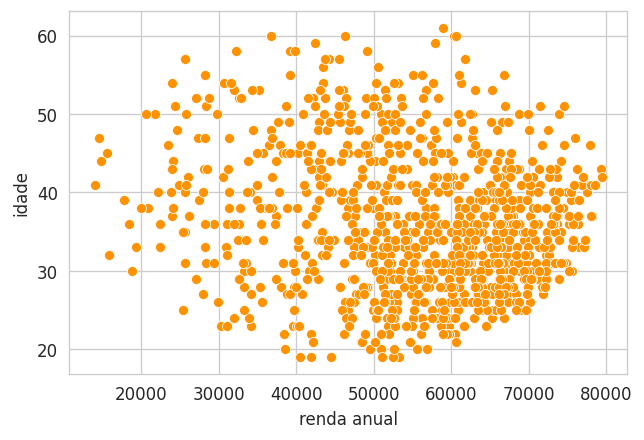

In [211]:
plt.figure(dpi=120)
sns.set_palette("Wistia_r")
sns.scatterplot(x='renda anual', y='idade', data=df)
plt.show()

Obs: Observamos que a maioria dos clientes ganham entre 55 e 70 mil por ano, e possuem de 25 a 35 anos de idade

# Visualizando quantidade de tempo em minutos que o cliente passa por dia na internet por idade

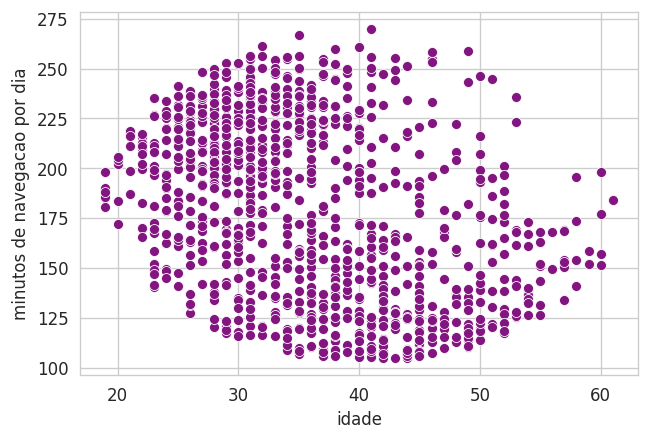

In [212]:
sns.set_palette("BuPu_r")
plt.figure(dpi=120)
sns.scatterplot(x='idade', y='minutos de navegacao por dia', data=df)
plt.show()

Obs: Dá para observar que as pessoas na faixa dos 30 anos são a maioria que passam mais tempo pela internet diariamente

# Agrupamentos

### Agrupando media de minutos que o cliente passa no site por sexo


In [213]:
df[['minutos no site','sexo']].groupby('sexo').mean().sort_values(by='minutos no site',ascending=False)

,minutos no site
sexo,
0,65.289287
1,64.688274


Obs: foi observado que tanto mulheres(0) quanto homens(1) passam em media 65 minutos no site
***

### Agrupando media de minutos que os clientes passam navegando na internet por sexo

In [214]:
df[['minutos de navegacao por dia','sexo']].groupby('sexo').mean().sort_values(by='minutos de navegacao por dia',ascending=False)

,minutos de navegacao por dia
sexo,
1,181.276923
0,178.816763


Obs: Clientes homens passam um pouco mais de tempo na internet que as mulheres
***

### Agrupando media de clientes que clicaram nos anuncios por sexo

In [215]:
df[['clicou no anuncio','sexo']].groupby('sexo').mean()

,clicou no anuncio
sexo,
0,0.518304
1,0.480249


Obs: As mulheres são mais propensas a clicarem nos anúncios
***

# Visualizando os dados acima em forma de gráfico

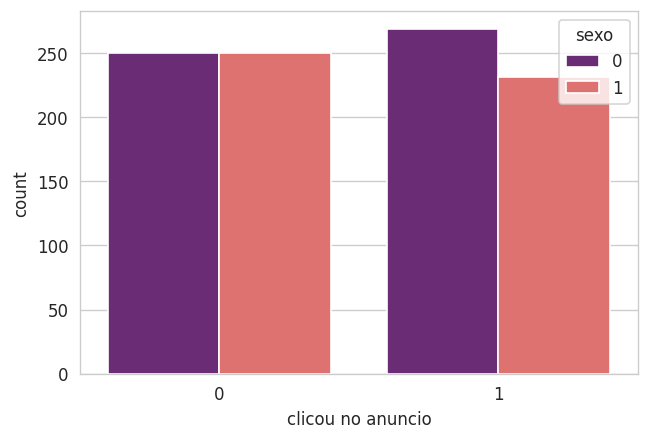

In [216]:
plt.figure(dpi=120)
plt.ylabel("Quantidade")
sns.countplot(data=df, x='clicou no anuncio',hue='sexo',palette="magma")
plt.show()

# Visualizando tempo que o cliente gasta no site com o tempo que ele passa na internet

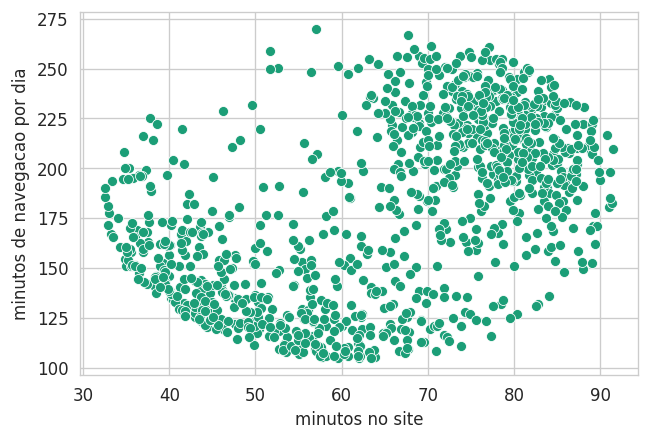

In [217]:
plt.figure(dpi=120)
sns.set_palette("Dark2")
sns.scatterplot(x='minutos no site', y='minutos de navegacao por dia', data=df)
plt.show()

Obs: É observado que as pessoas que mais passam minutos na internet sao as que passam mais tempo no site
***

***
# Eliminando colunas desnecessárias

In [218]:
df.drop(['titulo do anuncio','cidade do cliente','nacionalidade','horario que saiu da internet'], axis=1, inplace=True)
df.head()

,minutos no site,idade,renda anual,minutos de navegacao por dia,sexo,clicou no anuncio
0,68.95,35,61833.90,256.09,0,0
1,80.23,31,68441.85,193.77,1,0
2,69.47,26,59785.94,236.50,0,0
3,74.15,29,54806.18,245.89,1,0
4,68.37,35,73889.99,225.58,0,0


***
# Tendo uma visão geral de como os dados se relacionam baseado em quem clicou no anúncio ou não, com a finalidade de escolher o modelo ideal

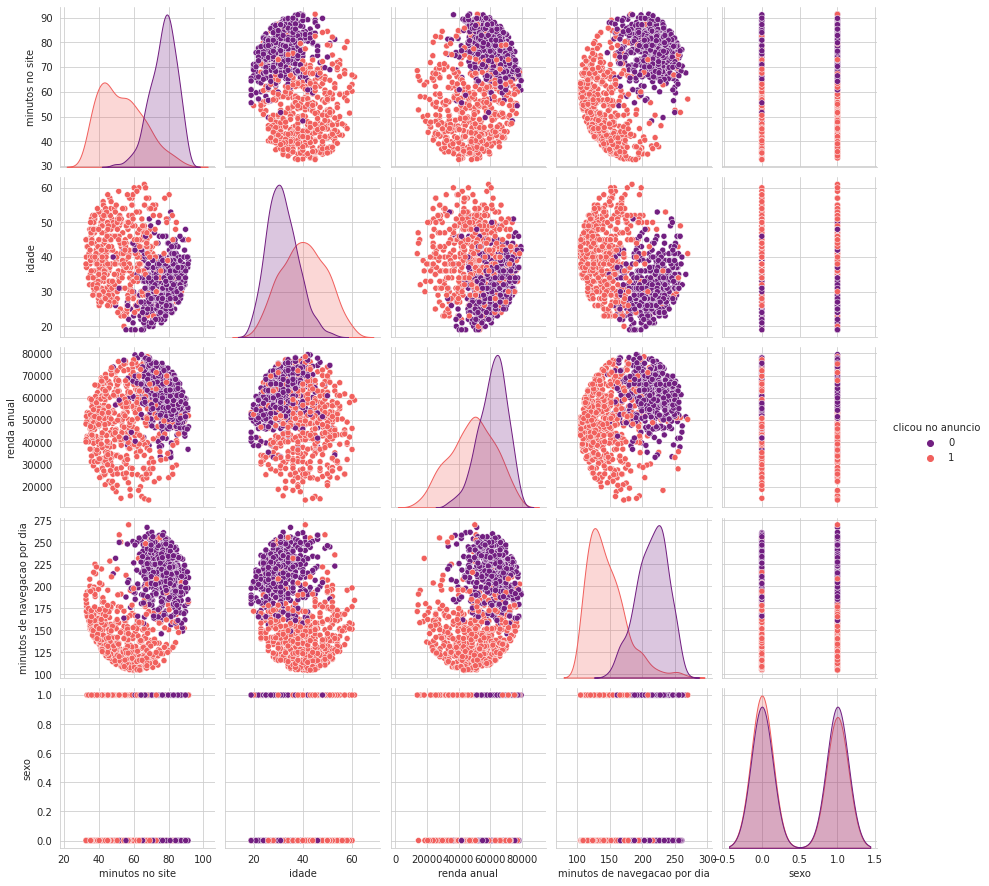

In [219]:
sns.pairplot(df, hue="clicou no anuncio", palette="magma")


***
# Modelo escolhido: Regressão Logística

Agora é hora de quebrar os dados em treino e teste e fitar o modelo.


In [220]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [221]:
X = df.iloc[:,:-1]
y = df['clicou no anuncio']

In [222]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, random_state=101)

In [223]:
lm = LogisticRegression()

In [224]:
lm.fit(Xtrain, ytrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

# Previsões e avaliações


In [225]:
predi = lm.predict(Xtrain)

## Verificando desempenho do modelo

In [226]:
acuracia = lm.score(Xtest, ytest)
acuracia*100

92.66666666666666


***

# Conclusão
### Com o modelo de regressão logistica foi possivel prever com uma chance de 92% de acerto se o cliente irá ou não clicar no anuncio baseado nas informações sobre seu histórico